In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [2]:
#physical_devices = tf.config.experimental.list_physical_devices('GPU')
#print("Num GPUs Available: ", len(physical_devices))
#tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
# Organize data into train, valid, test dirs
#os.chdir('data/GapVSnoGap')
#if os.path.isdir('train/NoGap') is False:
#    os.makedirs('train/NoGap')
#    os.makedirs('train/Gap')
#    os.makedirs('valid/NoGap')
#    os.makedirs('valid/Gap')
#    os.makedirs('test/NoGap')
#    os.makedirs('test/Gap')
#
#    for i in random.sample(glob.glob('Gap*'), 517):
#        shutil.move(i, 'train/Gap')      
#    for i in random.sample(glob.glob('NoGap*'), 171):
#        shutil.move(i, 'train/NoGap')
#    for i in random.sample(glob.glob('Gap*'), 517):
#        shutil.move(i, 'valid/Gap')        
#    for i in random.sample(glob.glob('NoGap*'), 171):
#        shutil.move(i, 'valid/NoGap')
#    for i in random.sample(glob.glob('Gap*'), 517):
#        shutil.move(i, 'test/Gap')      
#    for i in random.sample(glob.glob('NoGap*'), 171):
#        shutil.move(i, 'test/NoGap')

#os.chdir('../../')

In [4]:
train_path = 'data/GapVSnoGap/train'
valid_path = 'data/GapVSnoGap/valid'
test_path = 'data/GapVSnoGap/test'


In [5]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['Gap', 'NoGap'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['Gap', 'NoGap'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['Gap', 'NoGap'], batch_size=10, shuffle=False)

Found 688 images belonging to 2 classes.
Found 688 images belonging to 2 classes.
Found 688 images belonging to 2 classes.


In [6]:
#assert train_batches.n == 1000
#assert valid_batches.n == 1000
#assert test_batches.n == 100
#assert train_batches.num_classes == valid_batches.num_class == test_batches.num_class == 2

In [7]:
#imgs, labels = next(train_batches)

In [8]:
#def plotImages(images_arr):
#    fig, axes = plt.subplots(1, 10, figsize=(20,20))
#    axes = axes.flatten()
#    for img, ax in zip( images_arr, axes):
#        ax.imshow(img)
#        ax.axis('off')
#    plt.tight_layout()
#    plt.show()

In [9]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

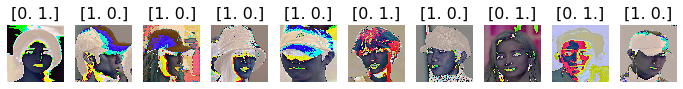

In [10]:
imgs, labels = next(train_batches)
plots(imgs, titles=labels)

In [11]:
#imgs, labels = next(train_batches)

In [12]:
#plotImages(imgs)
#print(labels)

In [13]:
#Build train CNN
#model = Sequential([
#    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
#    MaxPool2D(pool_size=(2, 2), strides=2),
#    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
#    MaxPool2D(pool_size=(2, 2), strides=2),
#    Flatten(),
#    Dense(units=2, activation='softmax')
#])

In [14]:
model = Sequential([Conv2D(32, (3,3),activation='relu',input_shape=(224,224,3)),
                   Flatten(),
                   Dense(2,activation='softmax'),
                   ])

In [15]:
model.compile(Adam(lr=.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
flatten (Flatten)            (None, 1577088)           0         
_________________________________________________________________
dense (Dense)                (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=valid_batches,
    validation_steps=len(valid_batches),
    epochs=5,
    verbose=2
)

Epoch 1/5
69/69 - 13s - loss: 142.0973 - accuracy: 0.7340 - val_loss: 165.1022 - val_accuracy: 0.7994
Epoch 2/5
69/69 - 11s - loss: 77.1387 - accuracy: 0.8314 - val_loss: 15.2629 - val_accuracy: 0.9375
Epoch 3/5
69/69 - 10s - loss: 17.6510 - accuracy: 0.9288 - val_loss: 5.3702 - val_accuracy: 0.9666
Epoch 4/5
69/69 - 10s - loss: 14.1379 - accuracy: 0.9360 - val_loss: 8.5118 - val_accuracy: 0.9564
Epoch 5/5
69/69 - 13s - loss: 17.5652 - accuracy: 0.9375 - val_loss: 1.9576 - val_accuracy: 0.9826


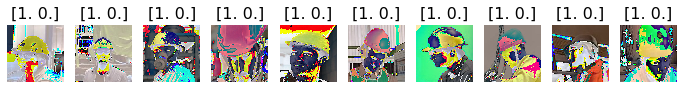

In [19]:
#Predict
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)


In [20]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [21]:
predictions = model.predict_generator(test_batches,steps=1,verbose=0)

Instructions for updating:
Please use Model.predict, which supports generators.


In [22]:
predictions

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [23]:
#test_batches.classes

In [24]:
test_batches.class_indices

{'Gap': 0, 'NoGap': 1}

In [25]:
#predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [26]:
#np.round(predictions)

In [27]:
#cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm = confusion_matrix(test_labels,predictions[10,687])

IndexError: index 10 is out of bounds for axis 0 with size 10

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
test_batches.class_indices

{'Gap': 0, 'NoGap': 1}

In [30]:
cm_plot_labels = ['Gap','NoGap']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

NameError: name 'cm' is not defined

In [31]:
#Build Fine-Tune
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [32]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [33]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return{'non_trainable_params' : non_trainable_params ,'trainable_params' : trainable_params }

In [34]:
params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544

In [35]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [36]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [38]:
params = count_params(model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 134260544

In [39]:
for layer in model.layers:
    layer.trainable = False

In [40]:
model.add(Dense(units=2, activation='softmax'))

In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [42]:
#Train Fine
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
history = model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
69/69 - 284s - loss: 0.5866 - accuracy: 0.7311 - val_loss: 0.1979 - val_accuracy: 0.9201
Epoch 2/5
69/69 - 281s - loss: 0.1314 - accuracy: 0.9535 - val_loss: 0.0838 - val_accuracy: 0.9855
Epoch 3/5
69/69 - 278s - loss: 0.0674 - accuracy: 0.9913 - val_loss: 0.0493 - val_accuracy: 0.9942
Epoch 4/5
69/69 - 279s - loss: 0.0420 - accuracy: 0.9956 - val_loss: 0.0336 - val_accuracy: 0.9985
Epoch 5/5
69/69 - 280s - loss: 0.0302 - accuracy: 0.9985 - val_loss: 0.0254 - val_accuracy: 0.9985


In [ ]:
assert model.history.history.get('accuracy')[-1] > 0.95


In [44]:
#Predict fine-tuned
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [45]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [46]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))


In [47]:
test_batches.class_indices

{'Gap': 0, 'NoGap': 1}

Confusion matrix, without normalization
[[517   0]
 [  1 170]]


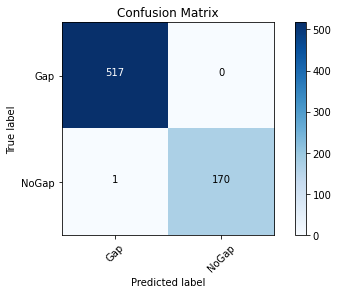

In [48]:
cm_plot_labels = ['Gap','NoGap']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [ ]:
#SAVEBEW
import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [ ]:
new_model.summary()

In [ ]:
new_model.get_weights()

In [ ]:
new_model.optimizer

In [ ]:
#SAVE JSON
json_string = model.to_json()

In [ ]:
json_string

In [ ]:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

In [ ]:
model_architecture.summary()

In [ ]:
#SAVE WEIGHT
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')

In [ ]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32,activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
model2.load_weights('models/my_model_weights.h5')

In [ ]:
model2.get_weights()

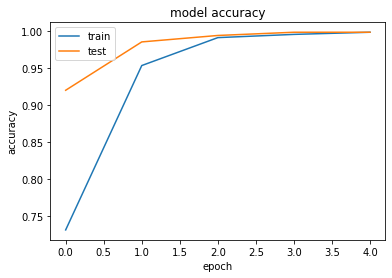

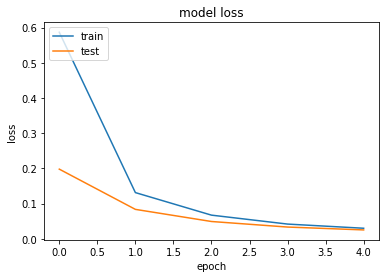

In [50]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#SAVE1
#model.save('medical_trial_model.h5')

In [ ]:
#from keras.models import load_model
#new_model = load_model('medical_trial_model.h5')

In [ ]:
#new_model.get_weights()

In [ ]:
#new_model.optimizer

In [ ]:
#json_string = model.to_json()

In [ ]:
#json_string

In [ ]:
#from keras.models import model_from_json
#model_architecture = model_from_json(json_string)

In [ ]:
#model_architecture.summary()

In [ ]:
#model.save_weights('my_model_weight.h5')

In [ ]:
#model2 = Sequential([
#    Dense(16, input_shape=(1,), activation='relu'),
#    Dense(32,activation='relu'),
#    Dense(2, activation='softmax')
#])

In [ ]:
#model2.load_weights('my_model_weight.h5')

In [85]:
test2_path = 'data/GapVSnoGap/test2'
test2_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test2_path, target_size=(224,224), classes=['Gap','NoGap'], batch_size=10, shuffle=False)

   
predictions = model.predict_generator(test2_batches,steps=1,verbose=0)


if predictions[0][1] > predictions[0][0]:
    print("NoGap")
else :
    print("Gap")

if predictions[1][1] > predictions[1][0]:
    print("NoGap")
else :
    print("Gap")
if predictions[2][1] > predictions[2][0]:
    print("NoGap")
else :
    print("Gap")
if predictions[3][1] > predictions[3][0]:
    print("NoGap")
else :
    print("Gap")
if predictions[4][1] > predictions[4][0]:
    print("NoGap")
else :
    print("Gap")
if predictions[5][1] > predictions[5][0]:
    print("NoGap")
else :
    print("Gap")
if predictions[6][1] > predictions[6][0]:
    print("NoGap")
else :
    print("Gap")
if predictions[7][1] > predictions[7][0]:
    print("NoGap")
else :
    print("Gap")
if predictions[8][1] > predictions[8][0]:
    print("NoGap")
else :
    print("Gap")
if predictions[9][1] > predictions[9][0]:
    print("NoGap")
else :
    print("Gap")

Found 10 images belonging to 2 classes.
Gap
Gap
NoGap
NoGap
Gap
NoGap
Gap
Gap
Gap
NoGap
